In [2]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
df = pd.read_csv('student-mat.csv',delimiter=';')

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
df.columns 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [11]:
# Check for missing values
missing_values = df.isnull().sum()

# Display column data types
data_types = df.dtypes

# Understand the dataset's size
dataset_size = df.shape

missing_values, data_types, dataset_size

(school        0
 sex           0
 age           0
 address       0
 famsize       0
 Pstatus       0
 Medu          0
 Fedu          0
 Mjob          0
 Fjob          0
 reason        0
 guardian      0
 traveltime    0
 studytime     0
 failures      0
 schoolsup     0
 famsup        0
 paid          0
 activities    0
 nursery       0
 higher        0
 internet      0
 romantic      0
 famrel        0
 freetime      0
 goout         0
 Dalc          0
 Walc          0
 health        0
 absences      0
 G1            0
 G2            0
 G3            0
 dtype: int64,
 school        object
 sex           object
 age            int64
 address       object
 famsize       object
 Pstatus       object
 Medu           int64
 Fedu           int64
 Mjob          object
 Fjob          object
 reason        object
 guardian      object
 traveltime     int64
 studytime      int64
 failures       int64
 schoolsup     object
 famsup        object
 paid          object
 activities    object
 nurse

In [13]:
 #Data Cleaning: Remove duplicate entries if any
duplicates_count = df.duplicated().sum()

# Remove duplicates
data_cleaned = df.drop_duplicates()

# Confirm removal by checking the size of the cleaned dataset
cleaned_dataset_size = data_cleaned.shape

duplicates_count, cleaned_dataset_size

(0, (395, 33))

### Data Analysis Questions

In [20]:
#What is the average score in math (G3)?
average_g3 = data_cleaned['G3'].mean()
print(f"Average score in math (G3): {average_g3:.2f}")

Average score in math (G3): 10.42


In [21]:
#How many students scored above 15 in their final grade (G3)?
students_above_15 = data_cleaned[data_cleaned['G3'] > 15].shape[0]
print(f"Number of students who scored above 15 in their final grade (G3): {students_above_15}")


Number of students who scored above 15 in their final grade (G3): 40


In [23]:
#Is there a correlation between study time and the final grade (G3)?
correlation = data_cleaned['studytime'].corr(data_cleaned['G3'])
print(f"Correlation between study time and final grade (G3): {correlation:.2f}")


Correlation between study time and final grade (G3): 0.10


In [24]:
#Which gender has a higher average final grade (G3)?
average_g3_by_gender = data_cleaned.groupby('sex')['G3'].mean()
print("Average final grade (G3) by gender:")
print(average_g3_by_gender)


Average final grade (G3) by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


### Data Visualization
 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


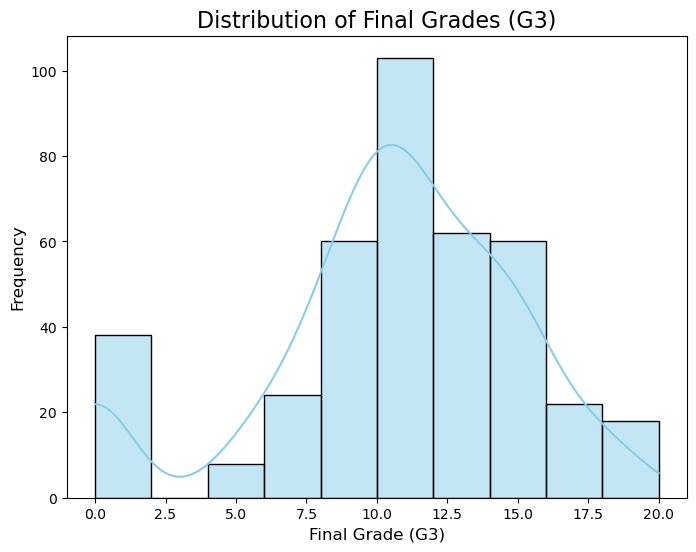

In [33]:
#Histogram of Final Grades (G3)

plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['G3'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)', fontsize=16)
plt.xlabel('Final Grade (G3)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


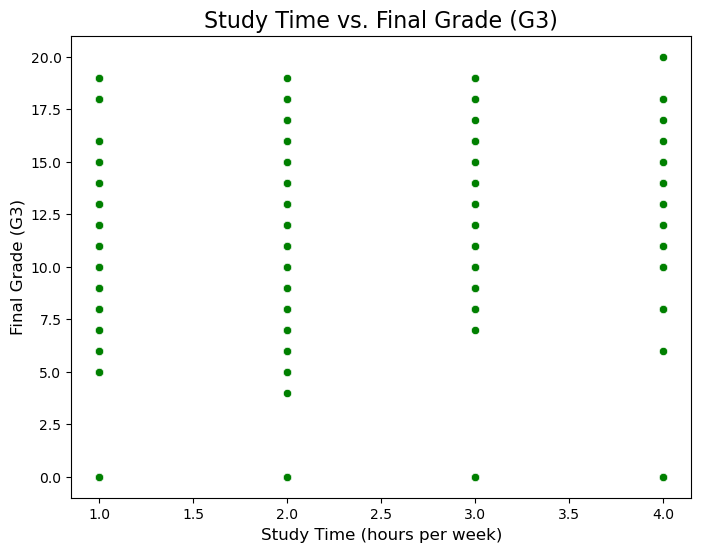

In [31]:
# Scatter plot between study time and G3
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['studytime'], y=data_cleaned['G3'], color='green')
plt.title('Study Time vs. Final Grade (G3)', fontsize=16)
plt.xlabel('Study Time (hours per week)', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.show()


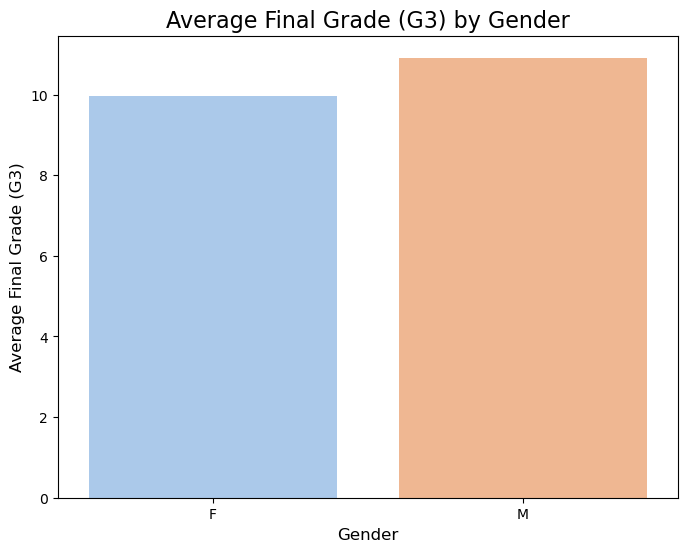

In [29]:
# Bar chart for average G3 by gender
average_g3_by_gender = data_cleaned.groupby('sex')['G3'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='G3', data=average_g3_by_gender, palette='pastel')
plt.title('Average Final Grade (G3) by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.show()
